## Package Import and datasets loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('test.csv', index_col=0)
df_train = pd.read_csv('train.csv', index_col=0)

## Train df

In [3]:
print(f'train shape:', df_train.shape)
print(f'data types:')
print(df_train.dtypes.value_counts())

train shape: (1460, 80)
data types:
object     43
int64      34
float64     3
dtype: int64


In [4]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


<AxesSubplot:ylabel='Id'>

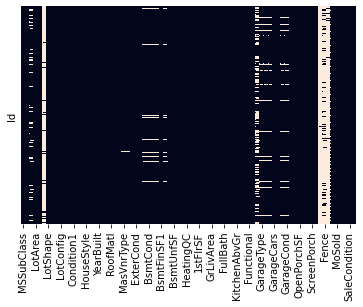

In [5]:
# heatmap of null values
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False)

In [6]:
# take the columns with less than 50 percent nan of total entries
df_train = df_train.loc[:, df_train.isnull().sum() < 0.5*df_train.shape[0]]
print(f'train shape:', df_train.shape)
print(f'data types:')
print(df_train.dtypes.value_counts())

train shape: (1460, 76)
data types:
object     39
int64      34
float64     3
dtype: int64


In [7]:
def lleno_nan(df):
    ''' Completa los valores nan de un dataframe,
    si la columna es numérica le coloca la media y si es categórica la moda'''
    columns_with_nan = df.columns[df.isna().any()]
    for x in columns_with_nan:
        if df[x].dtype == int or df[x].dtype == float:
            df[x] = df[x].fillna(df[x].mean())
        else:
            df[x] = df[x].fillna(df[x].mode()[0])
    return df

<ipython-input-7-0fddcf7d0870>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].fillna(df[x].mean())
<ipython-input-7-0fddcf7d0870>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = df[x].fillna(df[x].mode()[0])


<AxesSubplot:ylabel='Id'>

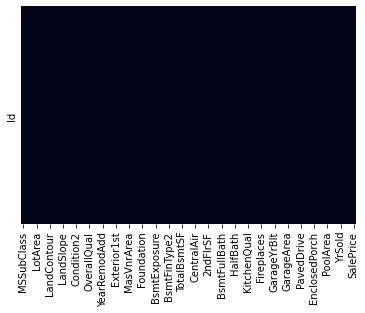

In [8]:
# Fill missing values for the train dataset
df_train = lleno_nan(df_train)
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False)

In [9]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Test df

test shape: (1459, 79)
data types:
object     43
int64      25
float64    11
dtype: int64


<AxesSubplot:ylabel='Id'>

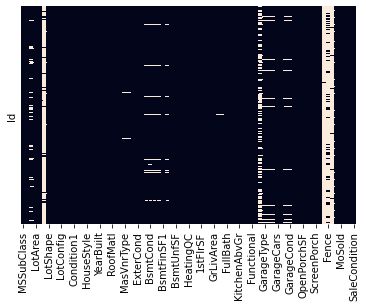

In [10]:
print(f'test shape:', df_test.shape)
print(f'data types:')
print(df_test.dtypes.value_counts())
# heatmap of null values
sns.heatmap(df_test.isnull(), yticklabels = False, cbar = False)

df shape: (1459, 74)
data types:
object     38
int64      25
float64    11
dtype: int64


<AxesSubplot:ylabel='Id'>

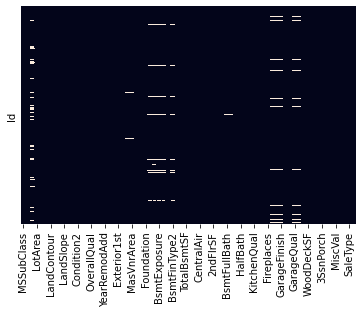

In [11]:
# take the columns with less than 50 percent nan of total entries
df_test = df_test.loc[:, df_test.isnull().sum() < 0.5*df_test.shape[0]]
print(f'df shape:', df_test.shape)
print(f'data types:')
print(df_test.dtypes.value_counts())
sns.heatmap(df_test.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:ylabel='Id'>

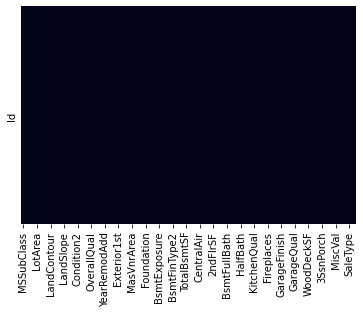

In [12]:
# Fill missing values for the test dataset
df_test = lleno_nan(df_test)
sns.heatmap(df_test.isnull(), yticklabels = False, cbar = False)

In [13]:
print(f' Test df format: {df_test.shape} \n Train df format: {df_train.shape}')

 Test df format: (1459, 74) 
 Train df format: (1460, 76)


In [14]:
# Check wich columns are missing in the test dataset
for col in df_train.columns:
    if col not in df_test.columns:
        print (col)

FireplaceQu
SalePrice


In [15]:
df_train['FireplaceQu'].value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [16]:
df_train.drop(['FireplaceQu'], axis = 1, inplace = True)

/opt/anaconda3/envs/house_prices/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Datasets merge

In [17]:
final_df = pd.concat([df_train,df_test],axis=0)

In [18]:
final_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN


In [19]:
final_df.loc[:, final_df.isnull().any()]

,SalePrice
Id,
1,208500.0
2,181500.0
3,223500.0
4,140000.0
5,250000.0
...,...
2915,NaN
2916,NaN
2917,NaN


## Categorical Features

In [20]:
# Me quedo con las variables categoricas y chequeo cuantas categorías tiene cada una.
# Además analizo como es la distribución por categorías
categorical_features = final_df.dtypes[final_df.dtypes == 'object'].index

for x in categorical_features:
    print('*' * 20)
    print(final_df.loc[:,x].value_counts())

********************
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
********************
Pave    2907
Grvl      12
Name: Street, dtype: int64
********************
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
********************
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
********************
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
********************
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
********************
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
********************
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr

In [21]:
def category_onehot_multcols(df, columns):
    
    i = 0
    for column in columns:
        
        #for each column apply get_dummies function and drop the column
        df1 = pd.get_dummies(df[column], drop_first=True)
        df.drop([column],axis=1,inplace=True)
        
        if i==0:
            
            df_dummies = df1.copy()
        else:
            
            df_dummies = pd.concat([df_dummies,df1],axis=1)
        
        i=i+1
       
        
    df_final=pd.concat([df,df_dummies],axis=1)
        
    return df_final

In [22]:
# onehot_multicom on categorical feature columns
final_df_onehot = category_onehot_multcols(final_df, categorical_features)

In [23]:
# Elimination of duplicated columns
final_df_onehot = final_df_onehot.loc[:,~final_df_onehot.columns.duplicated()]

In [24]:
final_df_onehot.shape

(2919, 177)

In [25]:
print(f'train_final shape:', final_df_onehot.shape)
print(f'data types:')
print(final_df_onehot.dtypes.value_counts())

final_df_onehot.head()

train_final shape: (2919, 177)
data types:
uint8      140
int64       25
float64     12
dtype: int64


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


## Machine-Learning Model

In [26]:
df_Train = final_df_onehot.iloc[:1460,:]
df_Test = final_df_onehot.iloc[1460:,:]

In [29]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/opt/anaconda3/envs/house_prices/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
# Primero separo las variables descriptivas de lo que quiero predecir
# Me quedo con todo menos con SalePrice como X
X = df_Train.drop(['SalePrice'],axis=1)
# Me quedo solo con SalePrice como y
y = df_Train['SalePrice']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separo el dataset de training en subsets training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # Mantener el random state me permite replicar resultados

# Comienzo con el Regressor (uso regressor y no classiffier porque la variable a predecir es numérica)
regressor = RandomForestRegressor(random_state=0)
# Fiteo el algoritmo a los subsets de entrenamiento
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [37]:
print(f'Regressor score on training subset:', regressor.score(X_train, y_train))
print(f'Regressor score on testing subset:', regressor.score(X_test, y_test))

Regressor score on training subset: 0.9763590517016885
Regressor score on testing subset: 0.8453150221475344


In [38]:
# Hiperparameter tunning con Cross-Validation 
# Randomized Search

from sklearn.model_selection import RandomizedSearchCV

# Número de árboles en el bosque
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Número de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Número máximo de niveles por árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de muestras necesarias para abrir un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras por nodo
min_samples_leaf = [2, 4]
# Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]
# Creación de la grilla random
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Se larga la búsqueda randomizada de hiperparámetros
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [39]:
print(f'Regressor best params:', rf_random.best_params_)
print(f'Regressor score on training subset:', rf_random.best_estimator_.score(X_train, y_train))
print(f'Regressor score on testing subset:', rf_random.best_estimator_.score(X_test, y_test))

Regressor best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}
Regressor score on training subset: 0.9685511014229828
Regressor score on testing subset: 0.8453725201813642


/opt/anaconda3/envs/house_prices/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fold: 0
RootMeanSquaredError: 23063.68853016901
Score: 0.8975783107354598
Fold: 1
RootMeanSquaredError: 26178.05728141299
Score: 0.8573423149465808
Fold: 2
RootMeanSquaredError: 31316.40918966729
Score: 0.883745474405091
Fold: 3
RootMeanSquaredError: 22246.960546020844
Score: 0.9097128472754809
Fold: 4
RootMeanSquaredError: 24407.029147625857
Score: 0.8860854772580103
Fold: 5
RootMeanSquaredError: 37246.02124414378
Score: 0.7829560046979546
Fold: 6
RootMeanSquaredError: 33952.711646922355
Score: 0.8203341643304128
Fold: 7
RootMeanSquaredError: 35900.96330139003
Score: 0.810134398759818
Fold: 8
RootMeanSquaredError: 25354.785423627614
Score: 0.8867112700154154
Fold: 9
RootMeanSquaredError: 40944.00701957298
Score: 0.8018464289516088
********************
Mean Metrics:
RMSE: 30061.063333055274
Score: 0.8536446691375833


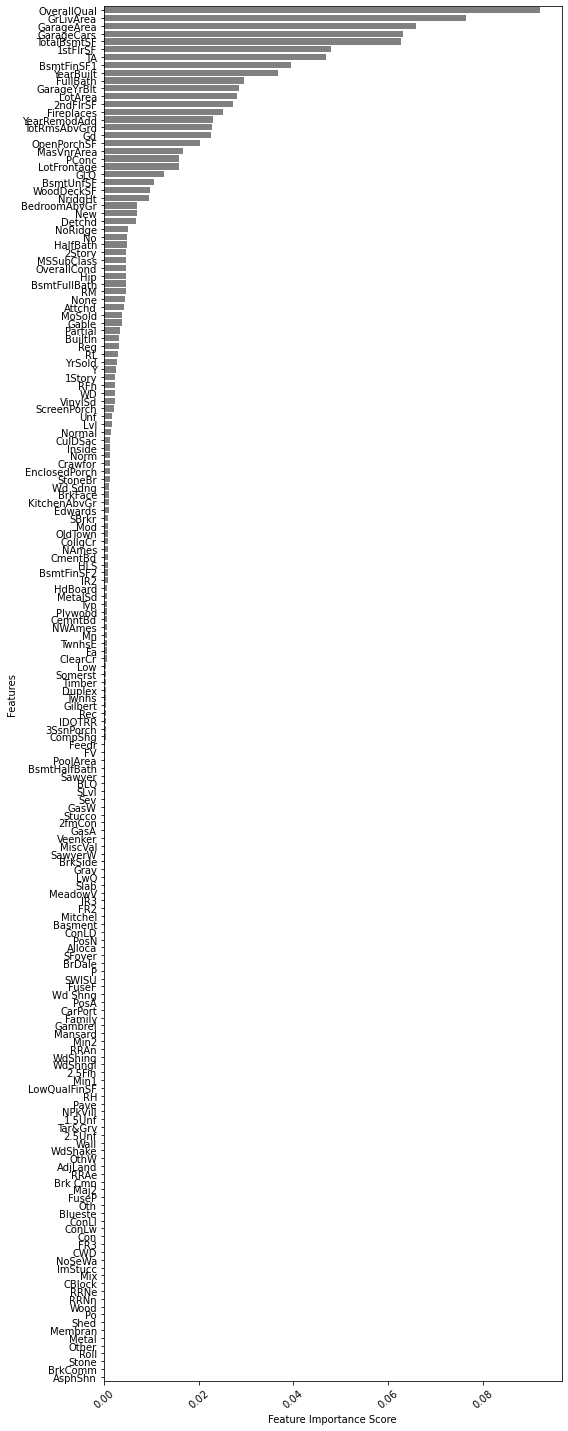

In [40]:
# Una vez que ya tengo los parámetros seteados puedo realizar una cross-validation 
# del modelo con todos los datos de el train set

regressor_final = RandomForestRegressor(bootstrap=True, max_depth=40, max_features=12, 
                                        min_samples_leaf=2, min_samples_split=2, n_estimators=200,
                                       random_state=0)

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

def CrossValidator(X, y):
    cv = StratifiedKFold(n_splits=10)
    rmse = []
    features_importances = []
    RMSE = []
    score = []
    for i, (train, test) in enumerate(cv.split(X, y)):
        regressor_final.fit(X.iloc[train], y.iloc[train])
        feature_imp = pd.Series(regressor_final.feature_importances_,index=X.columns).sort_values(ascending=False)
        features_importances.append(feature_imp)
        y_pred = regressor_final.predict(X.iloc[test])
        RMSE.append(np.sqrt(mean_squared_error(y.iloc[test], y_pred)))
        score.append(regressor_final.score(X.iloc[test], y.iloc[test]))
        print(f'Fold:', i)
        print(f'RootMeanSquaredError:', np.sqrt(mean_squared_error(y.iloc[test], y_pred)))
        print(f'Score:', regressor_final.score(X.iloc[test], y.iloc[test]))

    print('*'*20)
    print(f'Mean Metrics:')
    print(f'RMSE:', np.mean(RMSE))
    print(f'Score:', np.mean(score))

    plt.figure(figsize=(8,20))
    feat_impor_mean = pd.Series(sum(features_importances)/len(features_importances)).sort_values(ascending=False)
    sns.barplot(x=feat_impor_mean, y=feature_imp.index, color='grey')
    plt.xticks(rotation=40)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

CrossValidator(X, y)

In [41]:
# En el gráfico anterior veo que las últimas features casi no aportan nada al modelo. 
# Tiro todo aquello que aporta menos de 0.01

feature_imp = pd.Series(regressor_final.feature_importances_,index=X.columns).sort_values(ascending=False)

dropable = [x for x in feature_imp.index if feature_imp[x] < 0.01]

X.drop(columns=dropable, inplace=True)


/opt/anaconda3/envs/house_prices/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fold: 0
RootMeanSquaredError: 22236.70391944248
Score: 0.9047916074676516
Fold: 1
RootMeanSquaredError: 24905.80372627862
Score: 0.8708716898899457
Fold: 2
RootMeanSquaredError: 26644.017298114963
Score: 0.9158478213603749
Fold: 3
RootMeanSquaredError: 22439.461760658465
Score: 0.9081435918174788
Fold: 4
RootMeanSquaredError: 23311.50600670619
Score: 0.896082206152195
Fold: 5
RootMeanSquaredError: 42297.932762386445
Score: 0.7200849258551025
Fold: 6
RootMeanSquaredError: 31043.12960185596
Score: 0.8498077347157323
Fold: 7
RootMeanSquaredError: 36104.06230782774
Score: 0.8079801061417369
Fold: 8
RootMeanSquaredError: 23868.145663166797
Score: 0.899606825199652
Fold: 9
RootMeanSquaredError: 35146.53674940944
Score: 0.8539887591318054
********************
Mean Metrics:
RMSE: 28799.72997958471
Score: 0.8627205267731675


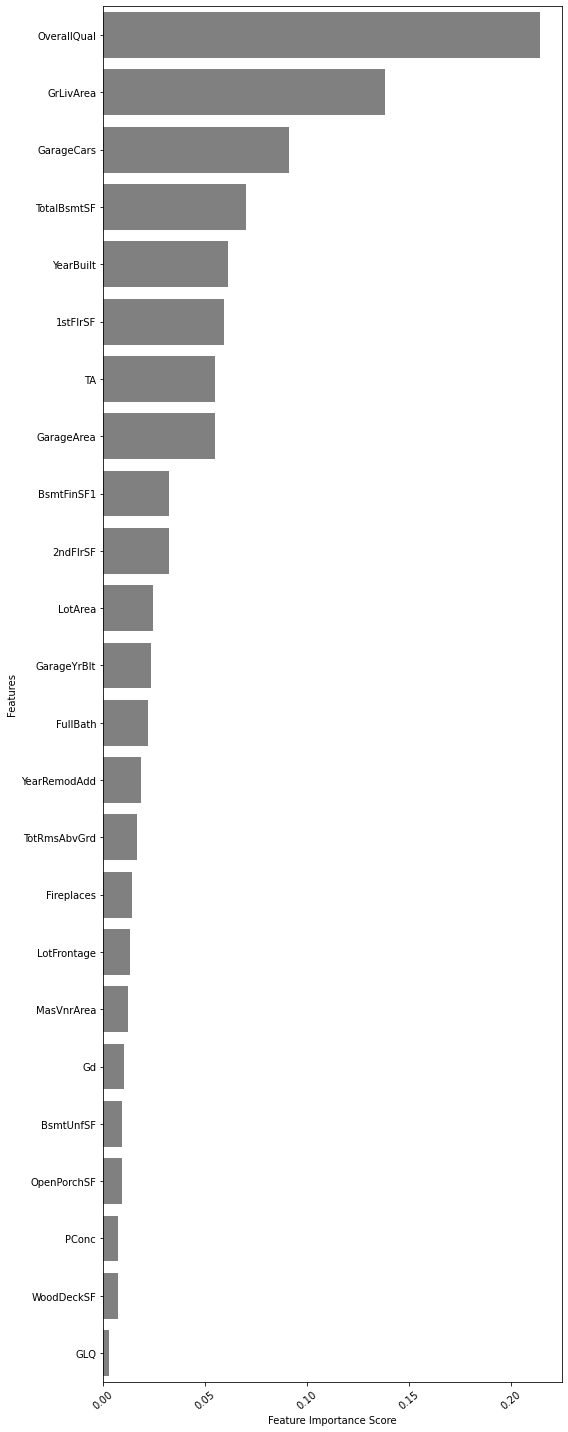

In [42]:
regressor_final = RandomForestRegressor(bootstrap=True, max_depth=40, max_features=6, 
                                        min_samples_leaf=2, min_samples_split=2, n_estimators=200,
                                       random_state=0)

CrossValidator(X, y)

In [43]:
features_finals = list(X.columns)
df_Test = df_Test[features_finals]

df_Test.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Gd,TA,PConc,GLQ
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,0,1961.0,1.0,730.0,140,0,0,1,0,0
1462,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,0,1958.0,1.0,312.0,393,36,0,1,0,0
1463,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,1,1997.0,2.0,482.0,212,34,0,1,1,1
1464,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,926,...,1,1998.0,2.0,470.0,360,36,0,1,1,1
1465,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,1280,...,0,1992.0,2.0,506.0,0,82,1,0,1,0


In [44]:
# Model prediction
SalePrice = regressor_final.predict(df_Test)

Id = list(df_Test.index)

df = pd.DataFrame()
df['Id'] = Id
df['SalePrice'] = SalePrice
df.set_index('Id', drop=True, inplace=True)
df.to_csv('NIS_PD_submission_2.csv')

In [45]:
pd.set_option('display.max_rows', 20000)
df = pd.read_csv('NIS_PD_submission_2.csv')
df

,Id,SalePrice
0,1461,127552.783671
1,1462,157106.324702
2,1463,182663.931468
3,1464,182474.236825
4,1465,193091.804113
5,1466,183918.660921
6,1467,169914.131087
7,1468,175259.820369
8,1469,177585.007274
9,1470,125809.720258


In [46]:
df_sample_submission = pd.read_csv('sample_submission.csv')
df_sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831
